In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import openpathsampling as paths

In [2]:
storage = paths.AnalysisStorage("mistis.nc")

In [3]:
mistis = storage.networks.load(0)

In [4]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)

True <openpathsampling.ensemble.TISEnsemble object at 0x110fe06d0>
True <openpathsampling.ensemble.TISEnsemble object at 0x111458310>
True <openpathsampling.ensemble.TISEnsemble object at 0x110f1c390>
True <openpathsampling.ensemble.TISEnsemble object at 0x111458790>


In [5]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [6]:
scheme = storage.schemes[0]
scheme.move_summary(storage.steps)

ms_outer_shooting ran 4.650% (expected 4.67%) of the cycles with acceptance 255/465 (54.84%)
repex ran 20.980% (expected 21.03%) of the cycles with acceptance 742/2098 (35.37%)
shooting ran 46.300% (expected 46.73%) of the cycles with acceptance 3151/4630 (68.06%)
minus ran 1.860% (expected 1.87%) of the cycles with acceptance 126/186 (67.74%)
pathreversal ran 26.210% (expected 25.70%) of the cycles with acceptance 1727/2621 (65.89%)


In [13]:
scheme.move_summary(storage.steps, 'minus')

Minus ran 0.930% (expected 0.93%) of the cycles with acceptance 84/93 (90.32%)
Minus ran 0.930% (expected 0.93%) of the cycles with acceptance 42/93 (45.16%)


In [7]:
# we need to load the states and the innermost interface for each transition
stateA = storage.volumes['A']
stateB = storage.volumes['B']
stateC = storage.volumes['C']
inner_AB = mistis.transitions[(stateA, stateB)].interfaces[0]
inner_AC = mistis.transitions[(stateA, stateC)].interfaces[0]
inner_BA = mistis.transitions[(stateB, stateA)].interfaces[0]

In [9]:
# got these from mistis_flux.ipynb
fluxes = {(stateA, inner_AB): 0.00134206626387,
          (stateA, inner_AC): 0.00130918783318,
          (stateB, inner_BA): 0.00129306050463}
mistis.set_fluxes(fluxes)

In [10]:
mistis.rate_matrix(storage.steps, force=True)

,"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})","({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",8.93533e-05,5.54233e-05,NaN
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,NaN,4.44717e-05


In [11]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

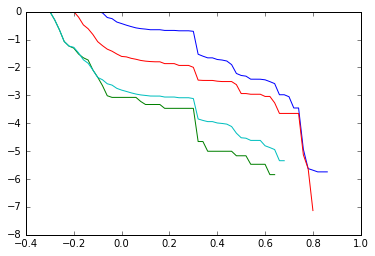

In [12]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))